# Matplotlib
데이터 시각화를 위한 가장 널리 사용되는 라이브러리 중 하나로, 다양한 형식의 그래프와 플롯을 그릴 수 있는 강력한 도구이다.<br>
주로 2D 플롯을 생성하는데 사용되며, 데이터 분석 결과를 시각적으로 표현하는데 매우 우용하다.<br>

- 주요 기능
    - 다양한 그래프 생성 : 선 그래프, 막대 그래프, 히스토그램, 산점도, 파이 차트 등 여러 유형의 차트를 그릴 수 있다.
    - 세부 조정가능 : 축의 레이블, 범례 , 제목 , 스타일 등 그래프의 거의 모든 요소를 세밀하게 조정할 수 있다.
    - 대규모 데이터 시각화 : 대규모 데이터셋에 대한 시각화도 효율적으로 처리할 수 있으며, 다양한 형식으로 데이터를 시각화할 수 있다.
    - Python 생태계와의 통합 : Numpy, padnas 등과 같은 라이브러리와 자연스럽게 통합되어, 분석과 시각화를 손쉽게 결합할 수 있다.
    - 플롯 저장 및 출력 : 생성한 그래프를 다양한 파일 형식(예 : PNG, PDF, SVG 등)으로 저장할 수 있다.

In [18]:
# pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd

## 기본선 그래프 그리기
선 그래프는 가장 기본적인 시각화 방법으로 x축과 y축을 매핑하여 그릴 수 있다. <br>
기본 선 그래프는 시간에 따른 변화량 혹은 연속적인 경향을 나태나는 경우 주로 사용된다. <br>
데이터가 연속적으로 변화하거나 시간 축을 따라 변화하는 데이터를 시각화할 때 적합하다.<br>

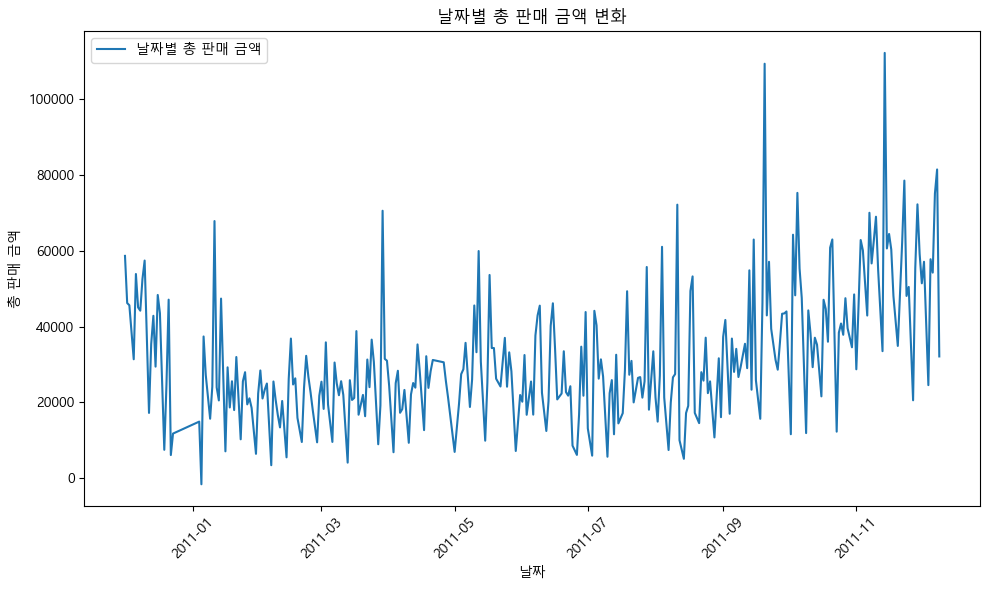

In [19]:
# 데이터 불러오기
ecommerce_df = pd.read_csv("../00_data/ecommerce_sales.csv", encoding="latin1")
# InvoiceDate 컬럼을 날짜 형식으로 변경
ecommerce_df["InvoiceDate"] = pd.to_datetime(ecommerce_df["InvoiceDate"])

ecommerce_df["TotalPrice"] = ecommerce_df["Quantity"] * ecommerce_df["UnitPrice"]
dail_sales = ecommerce_df.groupby(ecommerce_df["InvoiceDate"].dt.date)["TotalPrice"].sum()

plt.figure(figsize=(10,6))
plt.rc("font", family="Malgun Gothic")

# plot 차트를 그리는 매서드이다.
plt.plot(dail_sales.index, dail_sales.values, label="날짜별 총 판매 금액")

plt.title("날짜별 총 판매 금액 변화")
plt.xlabel("날짜")
plt.xticks(rotation=45)
plt.ylabel("총 판매 금액")
plt.legend()
plt.tight_layout()
plt.show()


## 막대형 그래프 그리기
막대 그래프(bar plot)은 카테고리 간의 비교를 시각화할 때 매우 유용하다 <br>
각 카테고리가 갖는 값을 막대 높이로 표현하여, 데이터를 직관적으로 비교할 수 있다.<br>
- 주요 사용
    - 카테고리형 데이터의 비교
    - 다른 카테고리 간의 상대적 차이 강조


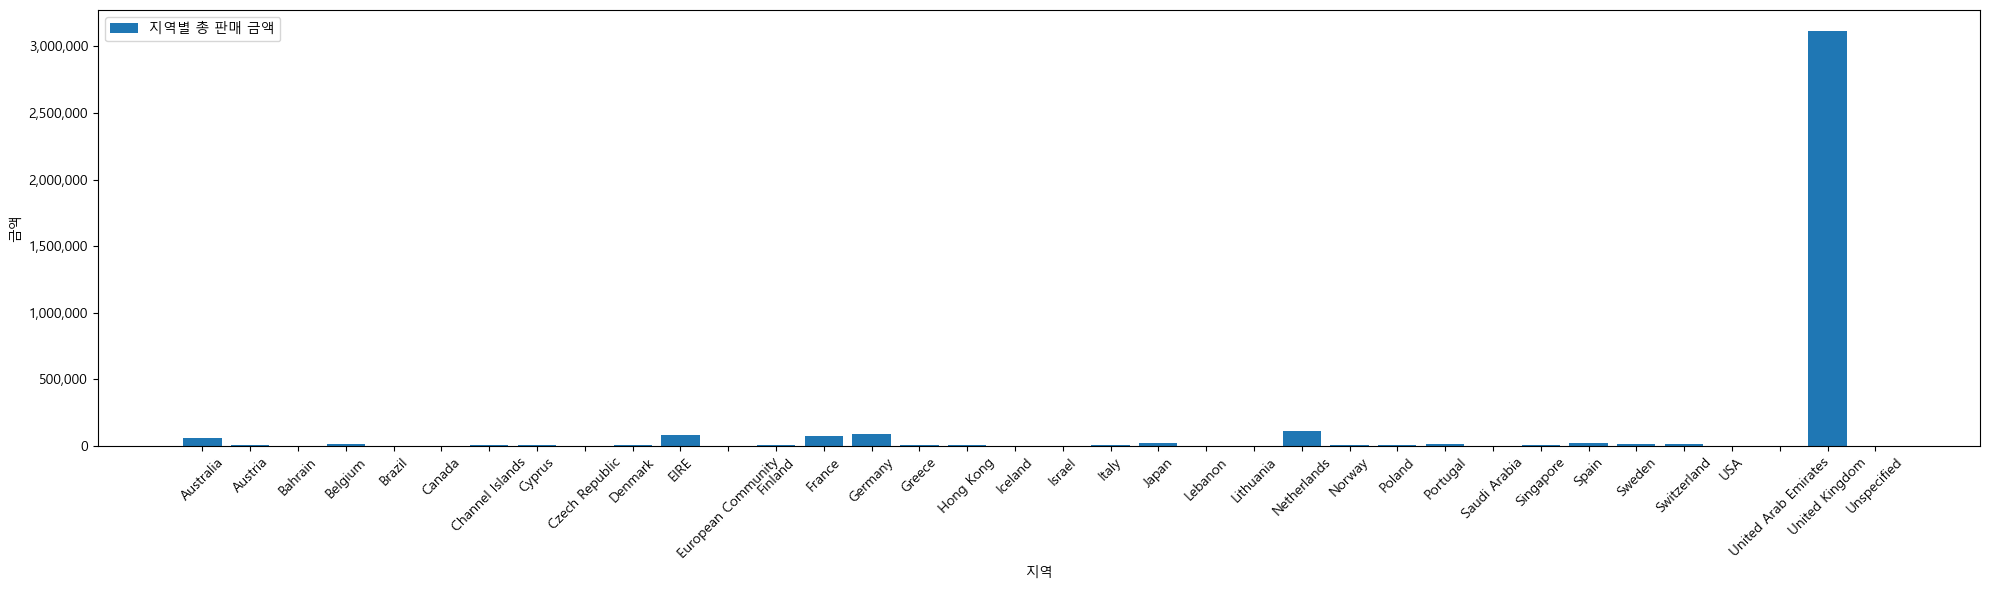

In [20]:
# 축의 값 포맷을 사용자 정의 형식으로 지정하기 위해서 사용하는 도구이다.
from matplotlib.ticker import FuncFormatter

ecommerce_df = pd.read_csv("../00_data/ecommerce_sales.csv", encoding="latin1")
ecommerce_df["InvoiceDate"] = pd.to_datetime(ecommerce_df["InvoiceDate"])

filtered_df = ecommerce_df[(ecommerce_df["InvoiceDate"] > "2010-12-01")& (ecommerce_df["InvoiceDate"] < "2011-06-01")].copy()

filtered_df["Total"] = filtered_df["Quantity"] * filtered_df["UnitPrice"]

country_salse = filtered_df.groupby("Country")["Total"].sum()
plt.figure(figsize=(20,6))
# 막대 그래프를 그리는 메서드이다.
plt.bar(country_salse.index, country_salse.values, label="지역별 총 판매 금액")
plt.xlabel("지역")
plt.xticks(rotation=45)
plt.ylabel("금액")

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')

plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.legend()
plt.show()


## 히스토그램
히스토그램은 데이터를 여러 구간으로 나누어 각 구간의 빈도를 시각화하는데 유용하다.

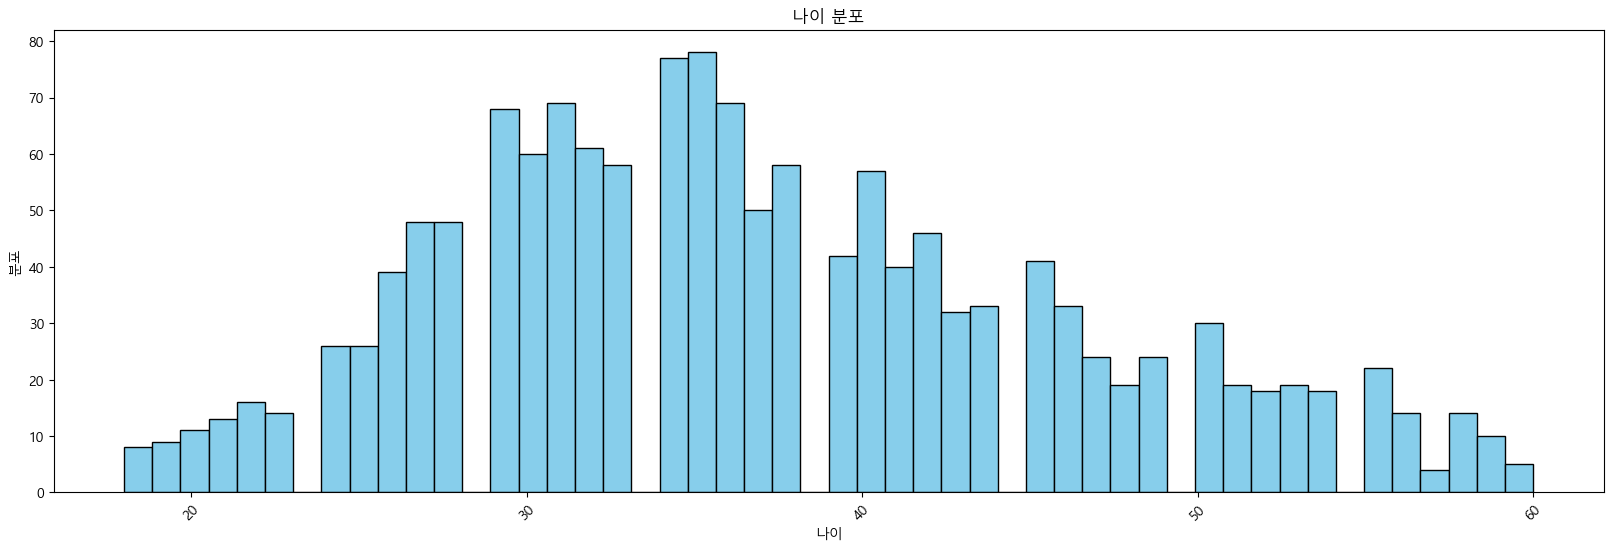

In [26]:
human_df = pd.read_csv("../00_data/Human_Resources.csv", encoding="latin1")

plt.figure(figsize=(20,6))
plt.hist(human_df["Age"], bins=50, color="skyblue", edgecolor="black")
plt.title("나이 분포")
plt.xlabel("나이")
plt.xticks(rotation=45)
plt.ylabel("분포")
plt.show()

## 산점도
산점도는 두 변수 간의 관계를 시각화 하는데 사용된다.


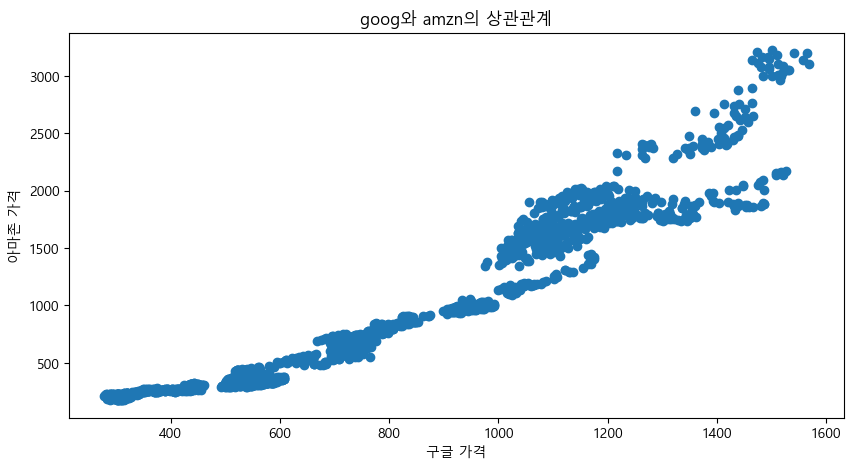

In [29]:
stock_df = pd.read_csv("../00_data/stock_daily_prices.csv")

goog = stock_df["GOOG"]
amzn = stock_df["AMZN"]

plt.figure(figsize=(10,5))

plt.scatter(goog, amzn)

plt.title("goog와 amzn의 상관관계")
plt.xlabel("구글 가격")
plt.ylabel("아마존 가격")
plt.show()

## 다중 플롯
하나의 그래프에 여러 데이터를 겹쳐서 표현할 수 있다. <br>
선 그래프나 막대 그래프에서 여러 변수를 비교할 때 유용하다.

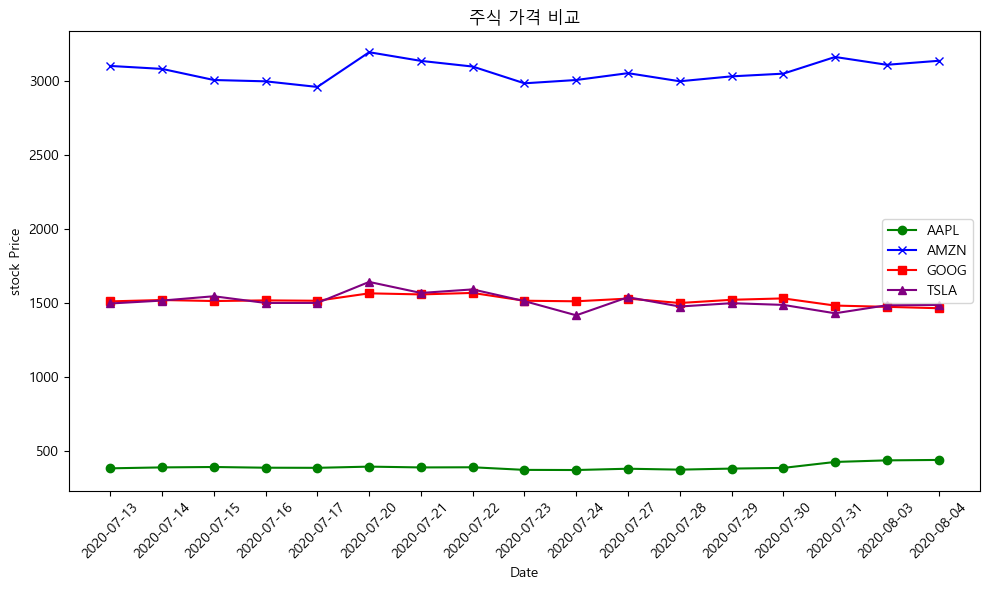

In [35]:
stock_df = pd.read_csv("../00_data/stock_daily_prices.csv")
filtered_df = stock_df[(stock_df["Date"] > "2020-07-10") & (stock_df["Date"] < "2020-08-05")].copy()


plt.figure(figsize=(10,6))

plt.plot(filtered_df["Date"], filtered_df["AAPL"], label="AAPL", color="green", marker="o")
plt.plot(filtered_df["Date"], filtered_df["AMZN"], label="AMZN", color="blue", marker="x")
plt.plot(filtered_df["Date"], filtered_df["GOOG"], label="GOOG", color="red", marker="s")
plt.plot(filtered_df["Date"], filtered_df["TSLA"], label="TSLA", color="purple", marker="^" )

plt.title("주식 가격 비교")
plt.xlabel("Date")
plt.ylabel("stock Price")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 서브플롯
하나의 figure 내에 여러 개의 그래프를 배치할 수 있다.<br>
모든 데이터를 한눈에 시각화하여 비교하고자 하는 경우 사용한다.

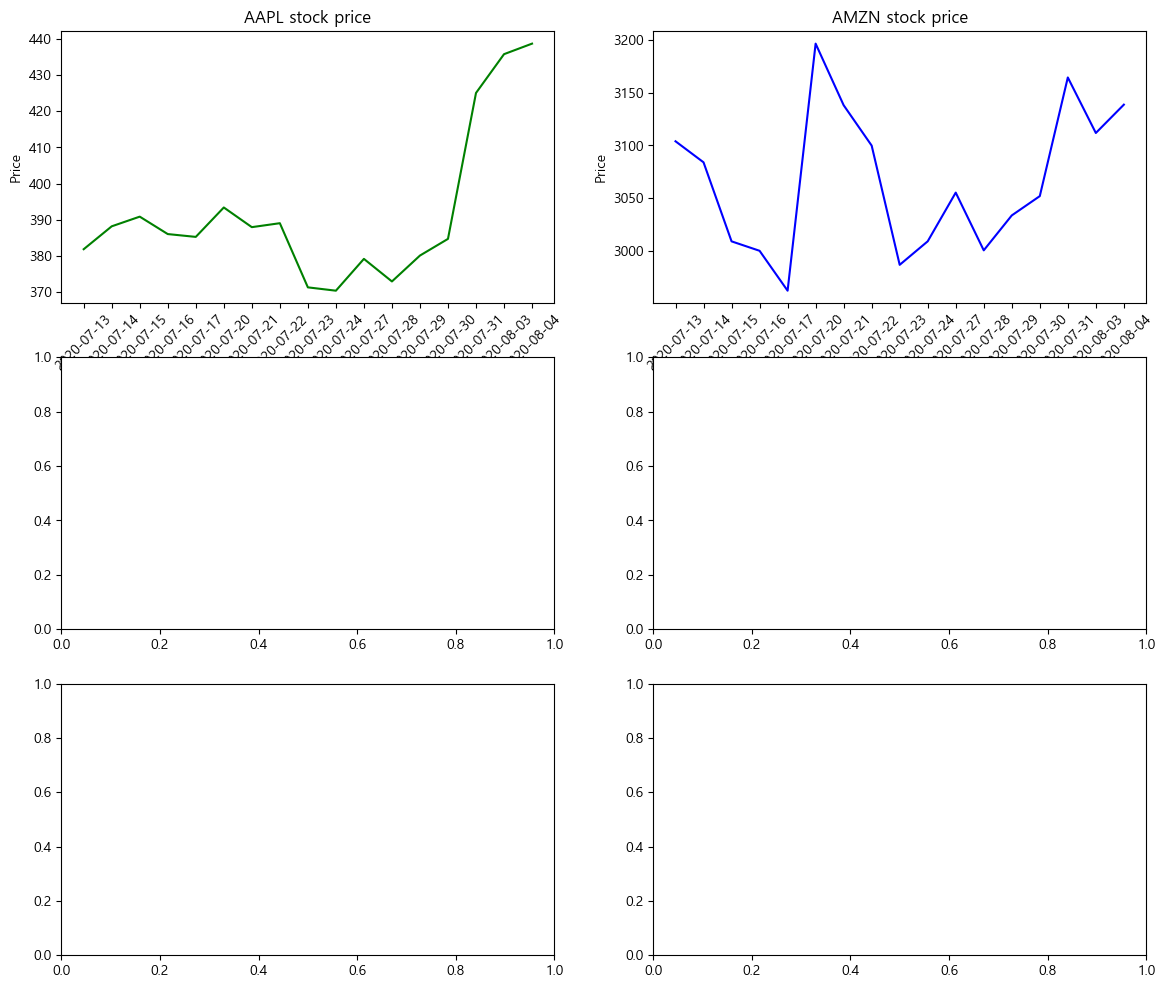

In [38]:
stock_df = pd.read_csv("../00_data/stock_daily_prices.csv")
filtered_df = stock_df[(stock_df["Date"] > "2020-07-10") & (stock_df["Date"] < "2020-08-05")].copy()


fig, axs = plt.subplots(3,2, figsize=(14,12))

axs[0,0].plot(filtered_df["Date"], filtered_df["AAPL"], label="AAPL", color="green")
axs[0,0].set_title("AAPL stock price")
axs[0,0].set_xlabel("Date")
axs[0,0].set_ylabel("Price")
axs[0,0].tick_params(axis='x', rotation=45)


axs[0,1].plot(filtered_df["Date"], filtered_df["AMZN"], label="AMZN", color="blue")
axs[0,1].set_title("AMZN stock price")
axs[0,1].set_xlabel("Date")
axs[0,1].set_ylabel("Price")
axs[0,1].tick_params(axis='x', rotation=45)
